# Forest Cover Prediction

- **Class Section: 2019 Summer - Monday 6:30 PM**

- **Project Team: Adam Sohn, Curtis Lin, Erik Hou, Youzhi (Chloe) Wu**


=====================================================================================================================

*The following section is intended for action items and discussions among project team. It is not part of the final report.* 

### <font color=red>  Please change the name in your own models based on the updated naming (in updated naming session) </font>


`for EDA`
train_raw_df
train_df


`for data analysis`
train_data, train_labels 
dev_data, dev_labels 
test_data, test_labels

# *Notes: Scoring Criteria*

- Problem description (10)

- Sensible methods (25) 

- Feature Engineering (20)

- Error analysis (15) 

- Notebook Presentation (10) 

- Good results (10) 

- In class pesentation (10) 

- Late (-10)

### <font color=red> Feature engineering to be completed</font>

    - PCA on soil type

### <font color=red>Models has been tested but still needs to be improved:</font>

    - kNN
    
    - GaussianNB
    
    - Decision Tree
    
    - Random Forest (best so far)
    
    - Logistic Regression
    
    - SVM

### <font color=red>  Models has not been tested:</font>

    - Neural network
    
    - Multinomial naive bayes

### <font color=red>  Propose layout for report</font>

- Problem description & objectives

- Package loading and data loading

- EDA

- Run through different models: for each model, feature engineering based on the model -> Error analysis

- Comparison on all models: pros and cons of each model, which model is optimal and why

- Summary and conclusion



*The actual report begins from here...*

=====================================================================================================================

## 1. Problem Description & Objectives

The objectives of this project is to predict the forest canopy cover type by using cartographic variables only. In this project, we would tackle this multi-class problem by modeling with different algorithms and approaches.

=====================================================================================================================

## 2. Package & Data Loading

In [1]:
%matplotlib inline

# General libraries
import csv
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from collections import defaultdict
from numpy import genfromtxt

# SK-learn libraries for learning.
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# SK-learn model packages 
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 

# SK-learn libraries for evaluation.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

import pandas as pd
pd.set_option('display.max_columns', None)

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

## <font color=red>  Updated naming</font>



In [10]:
### Name 

# Chloe for EDA part (Pandas format)

train_raw_df = pd.read_csv("./forest-cover-type-prediction/train.csv")
train_df = train_raw_df.loc[:,"Elevation":] #remove ID column from df

# Erik for data analysis (NumPy format)

with open('forest-cover-type-prediction/train.csv', 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    
my_data = np.genfromtxt('forest-cover-type-prediction/train.csv', delimiter=',')

# shuffle the training data
np.random.seed(0)

data = my_data[1:, 1:my_data.shape[1]-1]  # avoid getting headers and ID column
labels = my_data[1:,-1]

shuffle = np.random.permutation(np.arange(data.shape[0]))

shuffled_data = data[shuffle]
shuffled_labels = labels[shuffle]
shuffled_labels = shuffled_labels - 1

# split the data to 60% train, 20% dev and 20% test
num_train = int(shuffled_data.shape[0]*0.6)
num_dev = int(shuffled_data.shape[0]*0.8)

train_data, train_labels = shuffled_data[:num_train], shuffled_labels[:num_train]
dev_data, dev_labels = shuffled_data[num_train:num_dev], shuffled_labels[num_train:num_dev]
test_data, test_labels = shuffled_data[num_dev:], shuffled_labels[num_dev:]


In [11]:
# Chloe

# loading datasets
test_df = pd.read_csv("./forest-cover-type-prediction/test.csv")


In [ ]:
# Erik 

with open('forest-cover-type-prediction/train.csv', 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)
    
my_data = np.genfromtxt('forest-cover-type-prediction/train.csv', delimiter=',')

# shuffle the training data
np.random.seed(0)

data = my_data[1:, 1:my_data.shape[1]-1]  # avoid getting headers and ID column
labels = my_data[1:,-1]

shuffle = np.random.permutation(np.arange(data.shape[0]))

shuffled_data = data[shuffle]
shuffled_labels = labels[shuffle]
shuffled_labels = shuffled_labels - 1

# split the data to 60% train, 20% dev and 20% test
num_train = int(shuffled_data.shape[0]*0.6)
num_dev = int(shuffled_data.shape[0]*0.8)

train_data, train_labels = shuffled_data[:num_train], shuffled_labels[:num_train]
dev_data, dev_labels = shuffled_data[num_train:num_dev], shuffled_labels[num_train:num_dev]
test_data, test_labels = shuffled_data[num_dev:], shuffled_labels[num_dev:]

In [ ]:
# Adam

#Import Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print('train_df size =', len(train_df))
print('test_df size =', len(test_df))
# print(train_df.columns)

# Convert pd dataframe to np array
# Split train_df into training data and dev data

def data_to_np(train=train_df):
    '''Takes name of train_df name as argument in order to return data according to desired feature engineering. 
    Default is no feature engineering.'''
    forest_data = train.loc[:,train.columns != 'Cover_Type'].values
    forest_target = train[['Cover_Type']].values.flatten()
    X_train, X_dev, y_train, y_dev = train_test_split(forest_data, forest_target, test_size=0.3, random_state=0)
    return X_train, X_dev, y_train, y_dev

In [ ]:
# Curtis

#Read training dataset CSV file from local
with open('train.csv') as train:
    train_data = pd.read_csv(train, delimiter=',')
train.close()

#Read testing dataset CSV file from local
with open('test.csv') as test:
    test_data = pd.read_csv(test, delimiter=',')
test.close()

#Read sampleSubmission dataset CSV file from local
with open('sampleSubmission.csv') as sampleSubmission:
    sampleSubmission_data = pd.read_csv(sampleSubmission, delimiter=',')
sampleSubmission.close()

# set random seed
np.random.seed(0)

# split test data in dev data and test data 
train_data_s, dev_data_s = train_test_split(train_data, test_size = 0.3)

train_labels = train_data_s.loc[:,['Id', 'Cover_Type']]
train_data_sc= train_data_s.iloc[:, 0:55]
train_data_noID = train_data_sc.iloc[:,1:55]
train_data_cont = train_data_sc.iloc[:,1:11]
train_data_disc = train_data_sc.iloc[:,11:55]
train_cover_types = train_labels.loc[:,'Cover_Type']

dev_labels = dev_data_s.loc[:,['Id', 'Cover_Type']]
dev_data_sc= dev_data_s.iloc[:, 0:55]
dev_data_noID = dev_data_sc.iloc[:,1:55]
dev_data_cont = dev_data_sc.iloc[:,1:11]
dev_data_disc = dev_data_sc.iloc[:,11:55]
dev_cover_types = dev_labels.loc[:,'Cover_Type']

=====================================================================================================================

## 3. Sanity check and EDA

### *Chloe*

In [12]:
# Conduct quick sanity check imported data
# Sample submission is just sample file for submission instructions, can ignore
# Test_df is used for predictions
display(train_df.head())
print("Training data shape:",train_df.shape)
print(train_df.dtypes)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Training data shape: (15120, 55)
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64

In [13]:
print("Test data shape:",test_df.shape)
print(test_df.columns)

Test data shape: (565892, 55)
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_

> Test_df from test.csv does not have cover_type column. It is intended for prediction only. As such, we will need to subset train_df to train and dev datasets for our modeling process. 

In [14]:
print(train_df.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [15]:
# Count the number of instances of each class
print(train_df.groupby('Cover_Type').size())

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64


> The cover types are equally divided into 7 categories in our training csv. So there is no skewness in our dataset. 

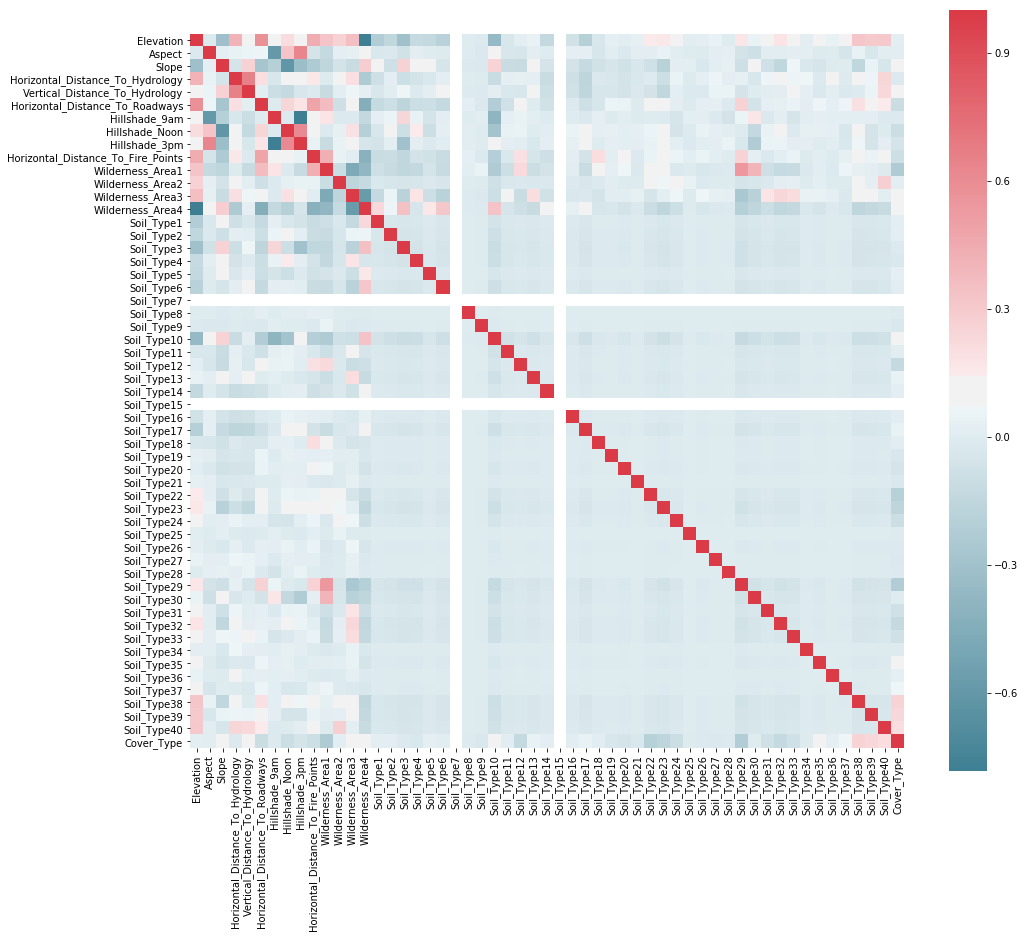

In [16]:
# Plot correlation heatmap to find highly correlated variables /features
corr = train_df.corr()

f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

> From above heat map, the following variables are considered relatively high correlated with cover type:
- Horizontal_Distance_To_Roadways
- Horizontal_Distance_To_Fire_Points
- Hillshade_Noon
- Wilderness_Area1
- Soil_Type12, Soil_Type22, Soil_Type23, Soil_Type29, Soil_Type32, Soil_Type38, Soil_Type39, Soil_Type40

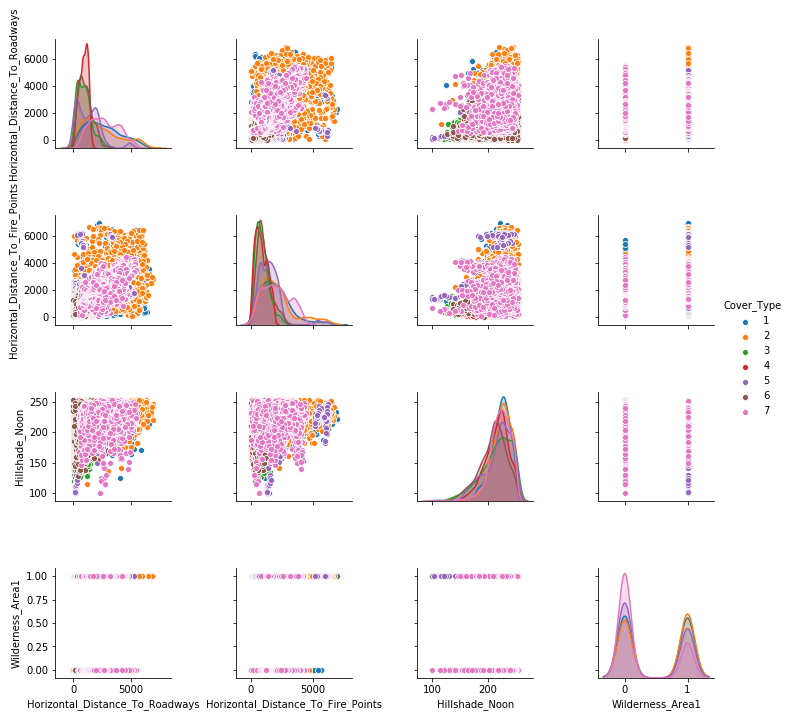

In [17]:
# Variables that are relatively high correlated with cover type are selected here
sns.pairplot(train_df, hue='Cover_Type', vars=["Horizontal_Distance_To_Roadways",
                                               "Horizontal_Distance_To_Fire_Points", 
                                               "Hillshade_Noon","Wilderness_Area1"])

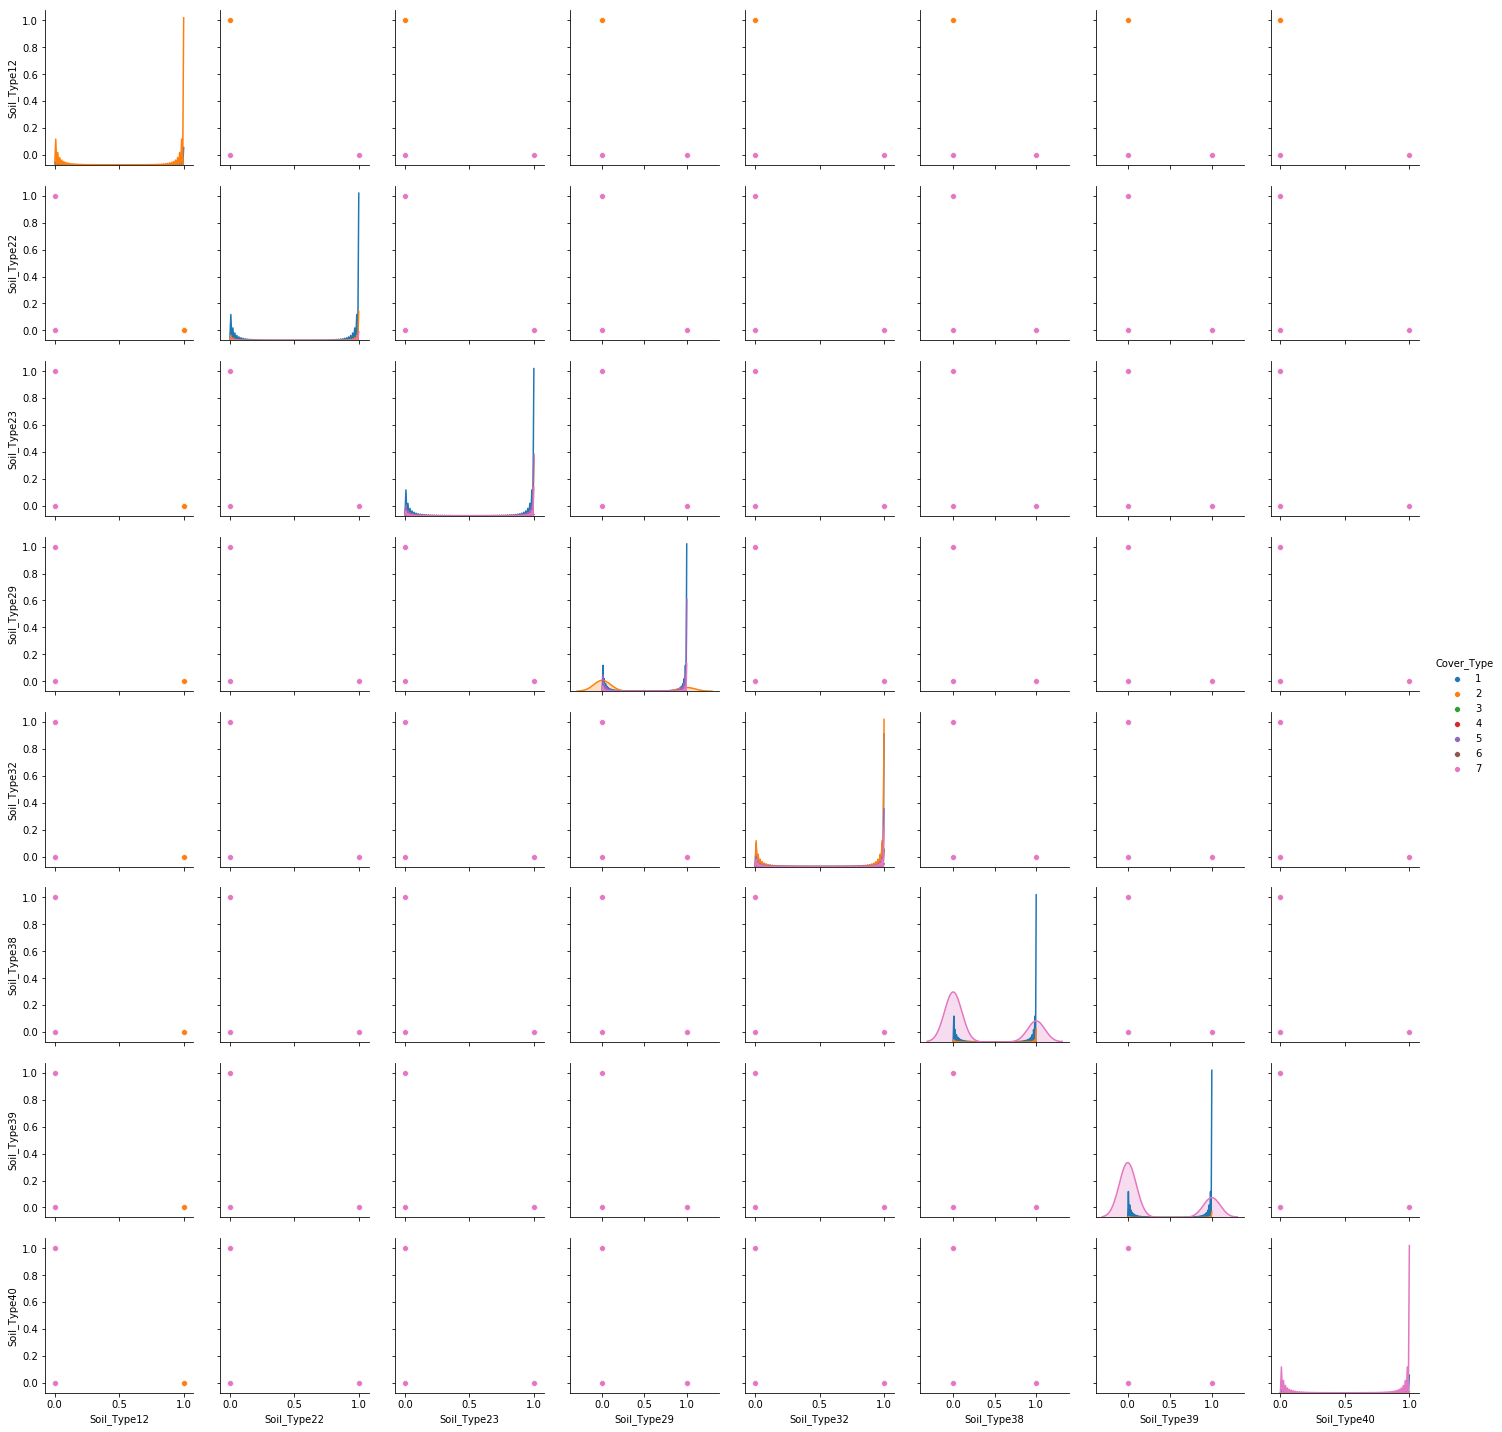

In [18]:
# Variables that are relatively high correlated with cover type are selected here
sns.pairplot(train_df, hue='Cover_Type', vars=["Soil_Type12","Soil_Type22",
                                               "Soil_Type23","Soil_Type29",
                                               "Soil_Type32","Soil_Type38",
                                               "Soil_Type39","Soil_Type40"])

### *Erik*

In [ ]:
print(train_data.shape)
print(train_labels.shape)

In [ ]:
def generate_cor_graph(data, size=(15,15), title = None):
    
    corr = data.corr()
    fig = plt.figure(figsize = size)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.tight_layout()
    plt.title(title, y=1.2)
    plt.show()

In [ ]:
df = pd.read_csv('forest-cover-type-prediction/train.csv')

In [ ]:
generate_cor_graph(df)

In [ ]:
cols = [i for i in range(1,15)]
cols = [-1] + cols
data_soil_id_exclu = df.iloc[:,cols]
generate_cor_graph(data_soil_id_exclu, (10,10))

In [ ]:
data_soil_id_exclu.describe()

In [ ]:
df.iloc[:, 15:].describe()

In [ ]:
cover_types = np.sort(df.iloc[:, -1].unique())
df_dict = {}

for cover_type in cover_types:
    df_dict[cover_type] = df.loc[df['Cover_Type'] == cover_type]

for cover_type in cover_types:
    generate_cor_graph(data = df_dict[cover_type], title = 'Cover Type' + str(cover_type))

### *Curtis*

In [ ]:
# Geographic information

train_data.iloc[:,0:4].describe() 

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
geograpy = ['Elevation', 'Aspect', 'Slope']

for i in range(1, 4):
    ax[i-1].hist(train_data.iloc[:,i])
    ax[i-1].set_title(geograpy[i-1])   

In [ ]:
# Hydrological information

train_data.iloc[:,4:6].describe()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
hydrology = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']

for i in range(2):
    ax[i].hist(train_data.iloc[:,i+4])
    ax[i].set_title(hydrology[i])

In [ ]:
# Distance to roadways and fire points

train_data.loc[:,['Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']].describe()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))


ax[0].hist(train_data.loc[:,'Horizontal_Distance_To_Roadways'])
ax[0].set_title('Horizontal_Distance_To_Roadways')
ax[1].hist(train_data.loc[:,'Horizontal_Distance_To_Fire_Points'])
ax[1].set_title('Horizontal_Distance_To_Fire_Points')

In [ ]:
# Hillshade information (0 to 255 index) 

train_data.iloc[:,7:10].describe()

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(16, 4))
hillshade = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

for i in range(3):
    ax[i].hist(train_data.iloc[:,i+7])
    ax[i].set_title(hillshade[i])
    
ax[3].scatter(train_data.loc[:,'Hillshade_9am'], train_data.loc[:,'Hillshade_Noon'])
ax[4].scatter(train_data.loc[:,'Hillshade_9am'], train_data.loc[:,'Hillshade_3pm'])

In [ ]:
# Wilderness area information

train_data.iloc[:,11:15].describe()

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
wilderness = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre']

for i in range(4):
    ax[i].hist(train_data.iloc[:,i+11])
    ax[i].set_title(wilderness[i])

In [ ]:
# Soil information (binary data)

train_data.iloc[:,15:56].describe()

1 Cathedral family - Rock outcrop complex, extremely stony.

2 Vanet - Ratake families complex, very stony.

3 Haploborolis - Rock outcrop complex, rubbly.

4 Ratake family - Rock outcrop complex, rubbly.

5 Vanet family - Rock outcrop complex complex, rubbly.

6 Vanet - Wetmore families - Rock outcrop complex, stony.

7 Gothic family.

8 Supervisor - Limber families complex.

9 Troutville family, very stony.

10 Bullwark - Catamount families - Rock outcrop complex, rubbly.

11 Bullwark - Catamount families - Rock land complex, rubbly.

12 Legault family - Rock land complex, stony.

13 Catamount family - Rock land - Bullwark family complex, rubbly.

14 Pachic Argiborolis - Aquolis complex.

15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.

17 Gateview family - Cryaquolis complex.

18 Rogert family, very stony.

19 Typic Cryaquolis - Borohemists complex.

20 Typic Cryaquepts - Typic Cryaquolls complex.

21 Typic Cryaquolls - Leighcan family, till substratum complex.

22 Leighcan family, till substratum, extremely bouldery.

23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.

25 Leighcan family, warm, extremely stony.

26 Granile - Catamount families complex, very stony.

27 Leighcan family, warm - Rock outcrop complex, extremely stony.

28 Leighcan family - Rock outcrop complex, extremely stony.

29 Como - Legault families complex, extremely stony.

30 Como family - Rock land - Legault family complex, extremely stony.

31 Leighcan - Catamount families complex, extremely stony.

32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.

33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.

34 Cryorthents - Rock land complex, extremely stony.

35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

36 Bross family - Rock land - Cryumbrepts complex, extremely stony.

37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.

38 Leighcan - Moran families - Cryaquolls complex, extremely stony.

39 Moran family - Cryorthents - Leighcan family complex, extremely stony.

40 Moran family - Cryorthents - Rock land complex, extremely stony.

=====================================================================================================================

## 4. Feature Engineering

### Feature information

Elevation - Elevation in meters

Aspect - Aspect in degrees azimuth

Slope - Slope in degrees

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

### *Adam*

In [ ]:
soil_feature = pd.read_csv("./forest-cover-type-prediction/soil_feature.csv")
print(soil_feature.head())

#### Feature Engineering Round 1 (Soil_Type15 , Id)
'Soil_Type15' is 'unspecified in the USFS Soil and ELU Survey.' This is not a distinct category and therefore does not aid classification. <br>
'Id' is not a feature, but rather acts to remove randomization, which is undesired.<br>

* Eliminate any row containing 'Soil_Type15'. Eliminate column for 'Soil_Type15'.
* Eliminate column for 'Id'

In [ ]:
train_df1 = train_df[train_df['Soil_Type15'] == 0]
test_df1 = train_df[test_df['Soil_Type15'] == 0]

train_df1 = train_df.drop(columns = ['Id', 'Soil_Type15'])
test_df1 = test_df.drop(columns = ['Id', 'Soil_Type15'])

#### Feature Engineering Round 2 (Soil_Type to features, keep Soil_Type)
Description of Soil Types yields commonalities which expands a sample's feature set.

* Create single column in train_df & test_df for 'Soil_Type' to match soil_feature featurizer table.
* Merge train_df and test_df on soil_feature featurizer table 'Soil_Type' column
* Eliminate Soil_Type columns. 
* Inclusive of Round1

In [ ]:
#Import data of featurizer table
soil_feature = pd.read_csv('./forest-cover-type-prediction/soil_feature.csv')

#Establish dataframes as deep copies
train_df2 = train_df1.copy(deep= True)
test_df2 = test_df1.copy(deep= True)

#Aggregating soil types in train_df2 and test_df2 for use as merge index
soil_cols = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40']
train_df2['Soil_Type'] = train_df2[soil_cols].idxmax(axis=1)
test_df2['Soil_Type'] = test_df2[soil_cols].idxmax(axis=1)

#Merging train_df2 and test_df2 with soil_feature
train_df2 = train_df2.merge(soil_feature, how = 'left', on = 'Soil_Type')
test_df2 = test_df2.merge(soil_feature, how = 'left', on = 'Soil_Type')

#Manually reordering columns on train_df2 to make 'Cover_Type' at the end of the list.  
#Note this is not necessary for test2_df due to absence of 'Cover_Type' column. 
#Also eliminating 'Soil_Type' columns.
reordered_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Rock outcrop', 'Rock Land',
#        'Complex',
        'Stony', 'Rubbly', 'Cyraquolls', 'Cryumbrepts',
       'Cryorthents', 'Leighcan', 'Till substratum', 'Catmount', 'Legault',
       'Moran', 'Bullwark', 'Crayaquepts', 'Vanet', 'Como', 'Cover_Type']
train_df2 = train_df2[reordered_cols]

#### Feature Engineering Round 3 (Feature Reduction)
Reducing features to only those w/ random forest scoring > 0.1
* Inclusive of Round2

In [ ]:
#Establish dataframes as deep copies
train_df3 = train_df2.copy(deep= True)
test_df3 = test_df2.copy(deep= True)

train_df3 = train_df3.reset_index(drop=True)

print(train_df3.columns)
print(train_df3['Cover_Type'].head(9))

train_keys = ['Elevation', 'Moran', 'Horizontal_Distance_To_Roadways', 'Cover_Type']
test_keys = ['Elevation', 'Moran', 'Horizontal_Distance_To_Roadways']

train_df3 = train_df3[train_keys]
test_df3 = test_df3[test_keys]

### *Curtis*

In [ ]:
# normalize continuous variables of training data 
train_data_cont_norm = preprocessing.normalize(train_data_cont)
train_data_cont_norm = pd.DataFrame(train_data_cont_norm)
train_data_cont_norm.columns = train_data_cont.columns.values
train_data_cont_norm.index = train_data_cont.index.values
train_data_cont_norm.head()

In [ ]:
# combine normalized continuous variable and binary variable of training data 
train_data_norm = pd.concat([train_data_cont_norm, train_data_disc], axis = 1)
train_data_norm.head()

In [ ]:
# normalize continuous variables of developmental data 
dev_data_cont_norm = preprocessing.normalize(dev_data_cont)
dev_data_cont_norm = pd.DataFrame(dev_data_cont_norm)
dev_data_cont_norm.columns = dev_data_cont.columns.values
dev_data_cont_norm.index = dev_data_cont.index.values
dev_data_cont_norm.head()

In [ ]:
# combine normalized continuous variable and binary variable of developmental data 
dev_data_norm = pd.concat([dev_data_cont_norm, dev_data_disc], axis = 1)
dev_data_norm.head()

> using PCA to reduce soil features

### *Chloe*

In [19]:
# Rank feature importance based off Random Forest Regressor results
names = train_df.columns.values
rf = RandomForestRegressor()
rf.fit(train_data, train_labels)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.4122, 'Elevation'), (0.0825, 'Horizontal_Distance_To_Fire_Points'), (0.0796, 'Horizontal_Distance_To_Roadways'), (0.0445, 'Soil_Type39'), (0.0441, 'Horizontal_Distance_To_Hydrology'), (0.0388, 'Vertical_Distance_To_Hydrology'), (0.0351, 'Aspect'), (0.0346, 'Hillshade_9am'), (0.0339, 'Hillshade_3pm'), (0.0303, 'Slope'), (0.029, 'Hillshade_Noon'), (0.028, 'Soil_Type38'), (0.0115, 'Wilderness_Area3'), (0.011, 'Soil_Type35'), (0.011, 'Soil_Type12'), (0.0108, 'Soil_Type32'), (0.0058, 'Soil_Type10'), (0.0053, 'Wilderness_Area1'), (0.0047, 'Soil_Type22'), (0.0043, 'Soil_Type40'), (0.0042, 'Soil_Type29'), (0.004, 'Soil_Type4'), (0.0039, 'Soil_Type33'), (0.0034, 'Soil_Type30'), (0.0029, 'Soil_Type13'), (0.0027, 'Soil_Type24'), (0.0026, 'Soil_Type23'), (0.0025, 'Soil_Type2'), (0.0022, 'Soil_Type31'), (0.0019, 'Soil_Type11'), (0.0018, 'Wilderness_Area2'), (0.0015, 'Wilderness_Area4'), (0.0015, 'Soil_Type34'), (0.0014, 'Soil_Type17'), (0.0013, 'Soil_Type20'), (0

=====================================================================================================================

## 5. Sensible Methods and Error Analysis

### <font color=blue> 5.1 k-nearest neighbor classifier </font>

### *Adam*

#### Function to score KNeighborsClassifier and GaussianNB results

In [ ]:
def score_fn(classifier, feat_eng = train_df1):
    '''Takes classifier function and feature engineering level as argument and returns score.'''
    data_train, data_dev, label_train, label_dev = data_to_np(feat_eng)
    cls = classifier
    cls.fit(data_train, label_train)
    cls_pred = cls.predict(data_dev)

    return cls.score(data_dev, label_dev)

#### Simple implementation of KNeighborsClassifier using default hyperparameters.  Feature Enginering Level1 

In [ ]:
#Default knn parameters: (n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)[source]
print('knn_score:', round(score_fn(classifier = KNeighborsClassifier(), feat_eng = train_df1),4))

#### Simple implementation of KNeighborsClassifier using default hyperparameters. Feature Enginering Level2

In [ ]:
#Default knn parameters: (n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)[source]
print('knn_score:', round(score_fn(classifier = KNeighborsClassifier(), feat_eng = train_df2),4))

#### Simple implementation of KNeighborsClassifier using default hyperparameters. Feature Enginering Level3

In [ ]:
#Default knn parameters: (n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)[source]
print('knn_score:', round(score_fn(classifier = KNeighborsClassifier(), feat_eng = train_df3),4))

=====================================================================================================================

### <font color=blue> 5.2 Naive Bayes classifier </font>

### *Adam*-GaussianNB

In [ ]:
print("Level 1")
print('gnb_score:', round(score_fn(classifier = GaussianNB(), feat_eng = train_df1),4))
print("Level 2")
print('gnb_score:', round(score_fn(classifier = GaussianNB(), feat_eng = train_df2),4))
print("Level 3")
print('gnb_score:', round(score_fn(classifier = GaussianNB(), feat_eng = train_df3),4))

### *Curtis*-GaussianNB

In [ ]:
clfGNB = GaussianNB()
clfGNB.fit(train_data_noID, train_cover_types)
dev_predGNB = clfGNB.predict(dev_data_noID)
pred_accuGNB = accuracy_score(dev_cover_types, dev_predGNB)
print("GNB_score: %0.4f" %pred_accuGNB)

=====================================================================================================================

### <font color=blue> 5.3 Random forest and decision tree classifier</font>

### *Erik*

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=0)
dt.fit(train_data, train_labels)

print('Accuracy (a decision tree):', dt.score(dev_data, dev_labels))

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_data, train_labels)

print('Accuracy (a random forest):', rfc.score(dev_data, dev_labels))

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.1)

abc.fit(train_data, train_labels)
print('Accuracy (adaboost with decision trees):', abc.score(dev_data, dev_labels))

### *Adam*

In [ ]:
#Random Forest Regressor for Feature Engineering Round1
X_train, X_dev, y_train, y_dev = data_to_np(train_df1)
names = train_df1.columns.values
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

In [ ]:
#Random Forest Regressor for Feature Engineering Round2
X_train, X_dev, y_train, y_dev = data_to_np(train_df2)
names = train_df2.columns.values
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

=====================================================================================================================

### <font color=blue> 5.4 Logistic Regression classifier</font>

### *Chloe*

In [20]:
# Train a default Logistic Regression model
model = LogisticRegression()  
model.fit(train_data, train_labels)
model_preds = model.predict(dev_data)
model_score = metrics.f1_score(dev_labels, model_preds, average='weighted')
print("F1 score:", model_score)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 score: 0.6629084597234868


In [21]:
# Train a Logistic Regression model with liblinear solver
model1 = LogisticRegression(solver='liblinear', multi_class='auto')  
model1.fit(train_data, train_labels)
model1_preds = model1.predict(dev_data)
model1_score = metrics.f1_score(dev_labels, model1_preds, average='weighted')
print("F1 score of liblinear solver:", model1_score)

F1 score of liblinear solver: 0.6629084597234868


In [22]:
# Train a Logistic Regression model with liblinear solver, penalty='l1'
model3 = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1')  
model3.fit(train_data, train_labels)
model3_preds = model3.predict(dev_data)
model3_score = metrics.f1_score(dev_labels, model3_preds, average='weighted')
print("F1 score of liblinear solver, L1 penalty:", model1_score)

F1 score of liblinear solver, L1 penalty: 0.6629084597234868


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
# Experiment with different C
c_values = [0.001, 0.01, 0.03, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0, 2.0, 10.0]

for i in c_values:
    model = LogisticRegression(C=i, penalty='l2', solver='liblinear', multi_class='auto')
    model.fit(train_data, train_labels)
    model_preds = model.predict(dev_data)

    print("F1 score of model with C =", i, "is", 
          metrics.f1_score(dev_labels, model_preds, average='weighted'))

F1 score of model with C = 0.001 is 0.586872559526497
F1 score of model with C = 0.01 is 0.649643022944367
F1 score of model with C = 0.03 is 0.662672618109299
F1 score of model with C = 0.1 is 0.6679484164066616
F1 score of model with C = 0.2 is 0.6715836619475961
F1 score of model with C = 0.3 is 0.6655439674133876
F1 score of model with C = 0.5 is 0.6726473083214994
F1 score of model with C = 0.7 is 0.6654170517566664
F1 score of model with C = 0.8 is 0.6689159542877857
F1 score of model with C = 1.0 is 0.6629084597234868
F1 score of model with C = 2.0 is 0.667074477172022
F1 score of model with C = 10.0 is 0.6672903257312109


In [24]:
# Use GridSearchCV to xperiment with different C
c_values = {'C': np.arange(0.01, 1.0 ,0.01)}
grid = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), param_grid=c_values, cv=5)
grid.fit(train_data, train_labels)
print('Optimal C parameter:', grid.best_params_)

best_logit = LogisticRegression(C=grid.best_params_['C'])
best_logit.fit(train_data, train_labels)
best_predict = best_logit.predict(dev_data)
best_score = metrics.f1_score(dev_labels, best_predict, average='weighted')
print("F1 score:", best_score)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Optimal C parameter: {'C': 0.5700000000000001}


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 score: 0.6691337539199163


=====================================================================================================================

### <font color=blue> 5.5 Support-vector machine classifier</font>

### *Curtis*

In [ ]:
### GridSearchCV

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 
#               'decision_function_shape': ('ovo', 'ovr'), 'gamma': ('auto', 'scale')}

parameters = {'C':[1, 10, 100, 1000], 'kernel':('linear', 'rbf')}
clf = svm.SVC(gamma = 'scale')
svc_all = GridSearchCV(clf, parameters, cv=5)
svc_all.fit(train_data_norm, train_cover_types)
dev_pred = svc_all.predict(dev_data_norm)
pred_accu = accuracy_score(dev_cover_types, dev_pred)
print(svc_all.cv_results_)
print("Highest accuary score: %0.4f" %pred_accu)

In [ ]:
### Single model

clf = svm.SVC(C = 1000, kernel = 'rbf', gamma = 'scale')
clf.fit(train_data_norm, train_cover_types)
dev_pred = clf.predict(dev_data_norm)
pred_accu = accuracy_score(dev_cover_types, dev_pred)
print("SVM accuary score: %0.4f" %pred_accu)


In [ ]:
### only with continuous variables

clf_cont = svm.SVC(C = 1000, kernel = 'rbf', gamma = 'scale')
clf_cont.fit(train_data_cont_norm, train_cover_types)
dev_pred_cont = clf_cont.predict(dev_data_cont_norm)
pred_accu_cont = accuracy_score(dev_cover_types, dev_pred_cont)
print("SVM accuary score (only continuous variables): %0.4f" %pred_accu_cont)

In [ ]:
### only discrete variables

clf_disc = svm.SVC(C = 1000, kernel = 'rbf', gamma = 'scale')
clf_disc.fit(train_data_disc, train_cover_types)
dev_pred_disc = clf_disc.predict(dev_data_disc)
pred_accu_cont = accuracy_score(dev_cover_types, dev_pred_disc)
print("SVM accuary score (only discrete variables): %0.4f" %pred_accu_cont)

=====================================================================================================================

## 6. Model Comparions, Findings and Conclusions

### *Erik*

### General
* The most direct correlations with cover type come from some soil type
* we have all zero for soil type 7 and 15, smoothing is required for NB if we want to keep the features
* Make sure ID is not used in training 
* The feature space is not sparse because it's mostly binary data and there's only 55 features
* Use cross-validation to optimize hyper-parameter
* The mean of soil_type features are all significantly below 0.5. Mostly below 0.1. Therefore, this means most cover_types have many soil_type = 0. We can try summing the soil_type features and maybe some pattern will emerge (some cover type are corresponding to diverse soil types and that's a good supplement feature to use)

#### KNN
* we will need to standardize the features if we want to make the features roughly contributes equally to the predictions

#### Naive Bayes
* we will need to binarize the dataset to use bernoulliNB since more than half of our variables are binary
* Conditional Independence:
    * We see that after conditioning on a specific cover type, the correlation increases especially when the features besides cover-types are involved. We need to take out the strongly correlated features before training

#### Decision Tree
* Make sure ID is not used in training
* Watch out for over fitting

#### Logistic Regression
* use one vs all
* some regularization

#### Neural Nets

> Can we use different sets of features for different models

### *Adam*

https://stats.stackexchange.com/questions/169400/naive-bayes-questions-continus-data-negative-data-and-multinomialnb-in-scikit
Why can't negative data be used here?
MultinomialNB assumes that features have multinomial distribution which is a generalization of the binomial distribution. Neither binomial nor multinomial distributions can contain negative values.

How is scikit-learn handling the continuous data?
If you want to work with bayesian methods use GaussianNb but generally there are a lot of estimators capable of handling continuous data in scikit-learn.

<font color=red>**Plot Probability Calibration curves (for model comparison)** </font>

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py